<a href="https://colab.research.google.com/github/shuklasid19/blockchain-classification/blob/main/endingroot2ai_ipy6nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prepare a report (pdf/pptx) based on your model result. 
Report should contain below points. 
1. Your thoughts on problem or what was your approach to solve the problem
2. Model Interpretation
3. Train & test accuracy score
4. Limitation of the model. 
5. You can add your own points as well

In [ ]:
#In order to classify we have to conert into numerical form ...
#suppose if two vectors 

This is a multi-class classification problem which in which class distribution is imbalanced so it will create problem the majority class will have advantage...

1.I will first Explore the dataset.

2.I will pre - preprocess data afterwards

3.Have to convert the data into numerical form from textual.

4.Tfidf and bagofwords with multinomial and randomforestclassifier.

# Importing the libararies

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

import re
import tensorflow as tf
print("Tensorflow Version",tf.__version__)

pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 500)

import os
os.chdir("/content/drive/MyDrive")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Tensorflow Version 2.5.0


In [ ]:
"""train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
validation_x = np.asarray(validation_x)
validation_y = np.asarray(validation_y)
"""

'train_x = np.asarray(train_x)\ntrain_y = np.asarray(train_y)\nvalidation_x = np.asarray(validation_x)\nvalidation_y = np.asarray(validation_y)\n'

#1.1 Importing the Dataset

In [ ]:
#read the data afterwords

import pandas as pd
df = pd.read_csv('root2ai - Data.csv')

In [ ]:
df.shape

(22704, 2)

In [ ]:
#top most values

df.head()

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


We have two columns

Text contains the textual information about blockchain

Target is label corresponding to Text

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22704 entries, 0 to 22703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    22701 non-null  object
 1   Target  22704 non-null  object
dtypes: object(2)
memory usage: 354.9+ KB


In [ ]:
df.describe()

,Text,Target
count,22701,22704
unique,20986,11
top,billion,FinTech
freq,41,8551


In [ ]:
df.dtypes

Text      object
Target    object
dtype: object

In [ ]:
#if we have duplicate

#df = df.drop_duplicates()

In [ ]:
df.shape

(22704, 2)

In [ ]:
#about 1600 examples dropped

In [ ]:
#missing values  or nan 

#df.isnull().sum()

In [ ]:
#dropping the missing value 

#df = df.dropna()

In [ ]:
df.shape #our final dataform

(22704, 2)

In [ ]:
# dropping the target
# feature variable
x = df.drop('Target', axis=1)

# target variable
y = df['Target']  

In [ ]:
#so we make copy of the text
messages = x.copy()

In [ ]:
messages['Text'][1]

'director could play role financial system'

2.1 
### Dataset Preprocessing
we will have to do data preprocessing before giving it to the model.
As we can see we have textual data preprocessing so we have to do

1.Stemming 

2.remove stopwords

3.remove special characters

4.convert words into small letters

In [ ]:

#porter stemmer will give us base word 
#we will go through each word and will be converted into small words
#and split and if any remove words are there will be removed from dataset
#join the sentences for all

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub("[^a-zA-Z]", " ", str(messages['Text'][i]))
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
17704
17705
17706
17707
17708
17709
17710
17711
17712
17713
17714
17715
17716
17717
17718
17719
17720
17721
17722
17723
17724
17725
17726
17727
17728
17729
17730
17731
17732
17733
17734
17735
17736
17737
17738
17739
17740
17741
17742
17743
17744
17745
17746
17747
17748
17749
17750
17751
17752
17753
17754
17755
17756
17757
17758
17759
17760
17761
17762
17763
17764
17765
17766
17767
17768
17769
17770
17771
17772
17773
17774
17775
17776
17777
17778
17779
17780
17781
17782
17783
17784
17785
17786
17787
17788
17789
17790
17791
17792
17793
17794
17795
17796
17797
17798
17799
17800
17801
17802
17803
17804
17805
17806
17807
17808
17809
17810
17811
17812
17813
17814
17815
17816
17817
17818
17819
17820
17821
17822
17823
17824
17825
17826
17827
17828
17829
17830
17831
17832
17833
17834
17835
17836
17837
17838
17839
17840
17841
17842
17843
17844
17845
17846
17847
17848
17849
17850
17851
17852
17853
17854
17855
17856
17857
17858
17859
17860
17861
1

In [ ]:
#all the textual data 

corpus

['reserv bank form expert committe base institut develop research bank technolog studi approach distribut ledger technolog help support shift',
 'director could play role financi system',
 'preliminari discuss secur transact studi research payment',
 'secur inde prove essenti transform financi system part effort move away heavi relianc cash base',
 'bank settlement normal take three day base payment verif technolog take less tier secur',
 'agarw head bank',
 'sever data secur regulatori oversight would need wide financi system',
 'relev transact regist avail publicli sequenti record serv effect tool transact settlement among differ payment chain chief risk offic global busi',
 'technolog need transact intermediari clearinghous financi establish thu quick secur inexpens',
 'seven bank morgan chase alreadi support certain cross border fortun',
 'meanwhil bank digit divis har technolog accord news',
 'bank reportedli creat posit chief technolog digit offic',
 'offic report directli charg 

In [ ]:
# our target feature
y

0        Blockchain
1        Blockchain
2        Blockchain
3        Blockchain
4        Blockchain
            ...    
22699      Reg Tech
22700      Reg Tech
22701      Reg Tech
22702      Reg Tech
22703      Reg Tech
Name: Target, Length: 22704, dtype: object

In [ ]:
#counts of all the Target

df['Target'].value_counts()

FinTech             8551
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        977
Stock Trading        787
Robo Advising        737
Data Security        347
Name: Target, dtype: int64

In [ ]:
df['Target'].unique()

array(['Blockchain', 'Bigdata', 'credit reporting', 'Cyber Security',
       'FinTech', 'Microservices', 'Neobanks', 'Robo Advising',
       'Stock Trading', 'Data Security', 'Reg Tech'], dtype=object)

In [ ]:
print(len(df['Target'].unique()))

11


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Type of Service')

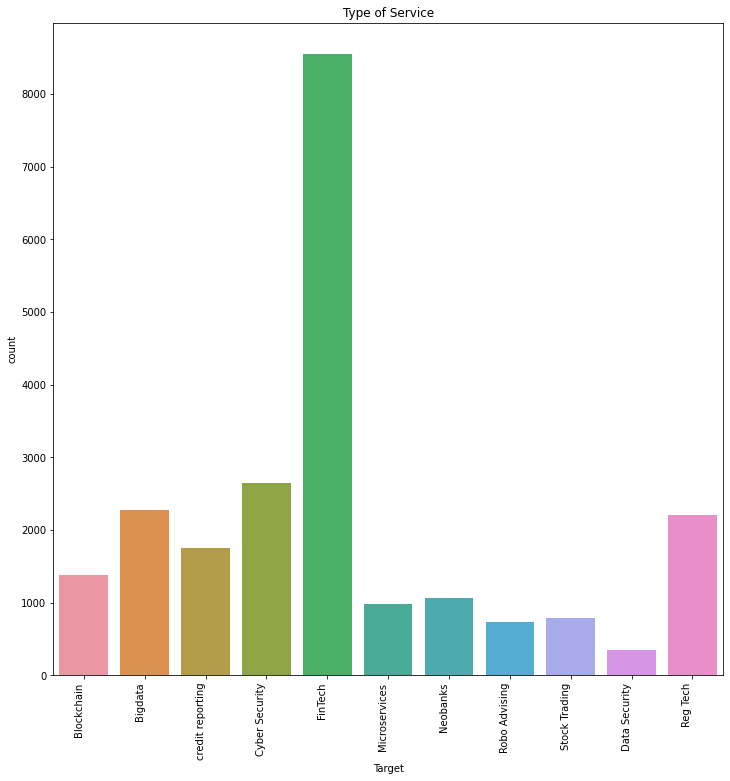

In [ ]:
#Types of Services
import seaborn as sns

sns.countplot(df['Target']).set_xticklabels(sns.countplot(df['Target']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type of Service')

In [ ]:
#We will have to encode our categorical variable

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
#Transform the feature

y = le.fit_transform(y)

In [ ]:
#########
y = np.asarray(y)

In [ ]:
#applying coutvectorizer
#creating the bag of words
#we will take max features 10000 and tri-grams

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,3))
x_cv  = cv.fit_transform(corpus).toarray()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn import metrics
import itertools

In [ ]:
#Now we will split the dataset for train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_cv, y, test_size=0.33,
                                                    random_state=42)

In [ ]:
print(x_train.shape, x_test.shape)

(15211, 10000) (7493, 10000)


In [ ]:
print(x_test.shape, y_test.shape)

(7493, 10000) (7493,)


3 
#Classification Models

3.1 Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
classifier = MultinomialNB()
print(cross_val_score(classifier, x_train , y_train , cv=10, scoring='accuracy').mean())

0.6446002137400095


accuracy: 0.657
Confusion matrix, without normalization


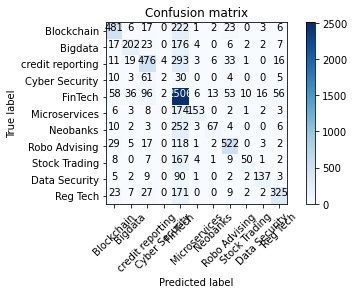

In [ ]:
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm , classes=['Blockchain', 'Bigdata', 'credit reporting', 'Cyber Security',
       'FinTech', 'Microservices', 'Neobanks', 'Robo Advising',
       'Stock Trading', 'Data Security', 'Reg Tech'])

In [ ]:
cm

array([[ 481,    6,   17,    0,  222,    1,    2,   23,    0,    3,    6],
       [  17,  202,   23,    0,  176,    4,    0,    6,    2,    2,    7],
       [  11,   19,  476,    4,  293,    3,    6,   33,    1,    0,   16],
       [  10,    3,   61,    2,   30,    0,    0,    4,    0,    0,    5],
       [  58,   36,   96,    2, 2506,    6,   13,   53,   10,   16,   56],
       [   6,    3,    8,    0,  174,  153,    0,    2,    1,    2,    3],
       [  10,    2,    3,    0,  252,    3,   67,    4,    0,    0,    6],
       [  29,    5,   17,    0,  118,    1,    2,  522,    0,    3,    2],
       [   8,    0,    7,    0,  167,    4,    1,    9,   50,    1,    2],
       [   5,    2,    9,    0,   90,    1,    0,    2,    2,  137,    3],
       [  23,    7,   27,    0,  171,    0,    0,    9,    2,    2,  325]])

In [ ]:
classifier = MultinomialNB(alpha=0.1)
#alpha can be chaged

In [ ]:
previous_score = 0
for alpha in np.arange(0, 1, 0.1):
  sub_classifier = MultinomialNB(alpha=alpha)
  sub_classifier.fit(x_train, y_train)
  y_pred = sub_classifier.predict(x_test)
  score = metrics.accuracy_score(y_test, y_pred)
  if score>previous_score:
    classifier = sub_classifier
  print("Alpha: {}, score:{}".format(alpha , score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, score:0.6219137862004538
Alpha: 0.1, score:0.6560790070732684
Alpha: 0.2, score:0.6590150807420259
Alpha: 0.30000000000000004, score:0.6631522754570933
Alpha: 0.4, score:0.6656879754437475
Alpha: 0.5, score:0.6642199386093688
Alpha: 0.6000000000000001, score:0.6655545175497131
Alpha: 0.7000000000000001, score:0.6639530228212999
Alpha: 0.8, score:0.6626184438809556
Alpha: 0.9, score:0.6599492860002669


In [ ]:
from sklearn.metrics import accuracy_score
print("model accuracy score: {0:0.4f}".format(accuracy_score(y_test, y_pred)))

model accuracy score: 0.6599


compare the train-set and test-set accuracy


In [ ]:
acc_nb = accuracy_score(y_test, y_pred)

y_pred_train = classifier.predict(x_train)

y_pred_train

array([4, 1, 4, ..., 4, 1, 4])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7449


In [ ]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(classifier.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(x_test, y_test)))

Training set score: 0.7449
Test set score: 0.6599


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.6405182538663868

1.As we can see it performs very poorly
reasons might be that classes are not properly distributed..

2.With increasing alpha value the accuracy increases

3.It gives accuracy of about 65%

4.model is overfitting

In [ ]:
#we could do over sampling or undersampling (smote)

# 3.2 RandomForest with randomsearch and hyperparameter tuning

In [ ]:
rf =RandomForestClassifier(criterion= 'gini',
 max_depth= 340,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 14,
 n_estimators= 200)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=340, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_test

array([4, 4, 7, ..., 2, 7, 0])

In [ ]:
rf.predict(x_test)

array([4, 4, 7, ..., 4, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68       761
           1       0.71      0.46      0.56       439
           2       0.64      0.55      0.59       862
           3       0.25      0.02      0.03       115
           4       0.60      0.88      0.71      2852
           5       0.87      0.43      0.58       352
           6       0.74      0.19      0.31       347
           7       0.78      0.75      0.76       699
           8       0.74      0.20      0.32       249
           9       0.83      0.55      0.66       251
          10       0.75      0.57      0.65       566

    accuracy                           0.66      7493
   macro avg       0.69      0.48      0.53      7493
weighted avg       0.68      0.66      0.64      7493



In [ ]:
pred=rf.predict(x_test)
print(confusion_matrix(y_test,pred))

[[ 411    0   13    0  312    1    0   15    1    4    4]
 [  20  121   16    0  270    2    0    0    1    2    7]
 [   9    7  370   11  436    1    1   13    4    1    9]
 [  12    0   38    3   58    1    0    0    0    0    3]
 [  49    9   45    4 2652    4    3   18   10   16   42]
 [   7    1   10    0  218  114    0    1    0    1    0]
 [   6    0    5    0  282    1   43    2    0    1    7]
 [  27    1   21    0  200    0    0  444    0    3    3]
 [   8    0    4    0  168    0    0    2   66    0    1]
 [   3    1    4    0  128    1    0    0    1  111    2]
 [  25    5   13    1  216    2    0    2    1    3  298]]


In [ ]:
acc_rf = accuracy_score(y_test, pred)

In [ ]:
print(acc_rf)

0.6183104230615241


In [ ]:
y_pred_train = rf.predict(x_train)

In [ ]:
y_pred_train

array([4, 1, 4, ..., 4, 1, 4])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8723


In [ ]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(rf.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(rf.score(x_test, y_test)))

Training set score: 0.8723
Test set score: 0.6183


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, pred, average='weighted')

0.5888313844897516

{'criterion': 'gini',
 'max_depth': 340,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 14,
 'n_estimators': 200}

Tfidf for converting preprocessed data into numerical feature
max_Features we will take 10000 most common ones, and again tri-gram

In [62]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features= 10000,ngram_range=(1,3))
x_tfidf = tfidf_v.fit_transform(corpus).toarray()

In [63]:
#Now we will split the dataset for train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.33,
                                                    random_state=42)


4.1 multinormialNb with tfidf vector

In [64]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

accuracy: 0.534
Confusion matrix, without normalization


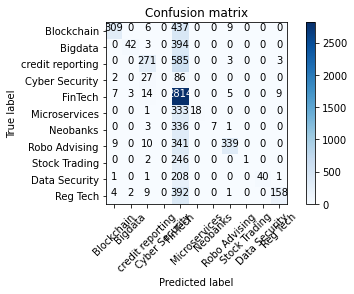

In [65]:
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm , classes=['Blockchain', 'Bigdata', 'credit reporting', 'Cyber Security',
       'FinTech', 'Microservices', 'Neobanks', 'Robo Advising',
       'Stock Trading', 'Data Security', 'Reg Tech'])

In [66]:
cm

array([[ 309,    0,    6,    0,  437,    0,    0,    9,    0,    0,    0],
       [   0,   42,    3,    0,  394,    0,    0,    0,    0,    0,    0],
       [   0,    0,  271,    0,  585,    0,    0,    3,    0,    0,    3],
       [   2,    0,   27,    0,   86,    0,    0,    0,    0,    0,    0],
       [   7,    3,   14,    0, 2814,    0,    0,    5,    0,    0,    9],
       [   0,    0,    1,    0,  333,   18,    0,    0,    0,    0,    0],
       [   0,    0,    3,    0,  336,    0,    7,    1,    0,    0,    0],
       [   9,    0,   10,    0,  341,    0,    0,  339,    0,    0,    0],
       [   0,    0,    2,    0,  246,    0,    0,    0,    1,    0,    0],
       [   1,    0,    1,    0,  208,    0,    0,    0,    0,   40,    1],
       [   4,    2,    9,    0,  392,    0,    0,    1,    0,    0,  158]])

In [67]:
classifier = MultinomialNB(alpha=0.1)
#alpha can be chaged

In [68]:
previous_score = 0
for alpha in np.arange(0, 1, 0.1):
  sub_classifier = MultinomialNB(alpha=alpha)
  sub_classifier.fit(x_train, y_train)
  y_pred = sub_classifier.predict(x_test)
  score = metrics.accuracy_score(y_test, y_pred)
  if score>previous_score:
    classifier = sub_classifier
  print("Alpha: {}, score:{}".format(alpha , score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, score:0.6324569598291739
Alpha: 0.1, score:0.6547444281329241
Alpha: 0.2, score:0.6379287334845856
Alpha: 0.30000000000000004, score:0.6199119177899373
Alpha: 0.4, score:0.6048311757640464
Alpha: 0.5, score:0.5885493126918457
Alpha: 0.6000000000000001, score:0.574135860136127
Alpha: 0.7000000000000001, score:0.5643934338716136
Alpha: 0.8, score:0.5514480181502736
Alpha: 0.9, score:0.5430401708261043


In [69]:
from sklearn.metrics import accuracy_score
print("model accuracy score: {0:0.4f}".format(accuracy_score(y_test, y_pred)))

model accuracy score: 0.5430


In [70]:
acc_nb = accuracy_score(y_test, y_pred)

y_pred_train = classifier.predict(x_train)

y_pred_train

array([4, 1, 4, ..., 4, 4, 4])

In [71]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.5818


In [72]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(classifier.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(x_test, y_test)))

Training set score: 0.5818
Test set score: 0.5430


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.43      0.58       761
           1       0.87      0.10      0.19       439
           2       0.77      0.34      0.47       862
           3       0.00      0.00      0.00       115
           4       0.46      0.98      0.63      2852
           5       1.00      0.06      0.11       352
           6       1.00      0.02      0.05       347
           7       0.95      0.51      0.66       699
           8       1.00      0.01      0.02       249
           9       1.00      0.19      0.32       251
          10       0.92      0.29      0.44       566

    accuracy                           0.54      7493
   macro avg       0.81      0.27      0.31      7493
weighted avg       0.73      0.54      0.48      7493



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4.2 RandomForest with randomsearch and hyperparameter tuning

In [74]:
rf =RandomForestClassifier(criterion= 'gini',
 max_depth= 340,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 14,
 n_estimators= 200)

In [75]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=340, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
y_test

array([4, 4, 7, ..., 2, 7, 0])

In [77]:
y_pred = rf.predict(x_test)

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.53      0.60       761
           1       0.86      0.27      0.41       439
           2       0.68      0.42      0.52       862
           3       0.17      0.03      0.05       115
           4       0.53      0.93      0.68      2852
           5       0.82      0.34      0.48       352
           6       0.93      0.12      0.21       347
           7       0.88      0.64      0.74       699
           8       0.79      0.25      0.38       249
           9       0.77      0.42      0.55       251
          10       0.79      0.51      0.62       566

    accuracy                           0.61      7493
   macro avg       0.72      0.40      0.48      7493
weighted avg       0.68      0.61      0.58      7493



In [80]:
pred=rf.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[ 401    0   15    0  318    1    0   15    1    4    6]
 [  18  117   19    0  268    7    0    0    1    2    7]
 [  10    6  361   11  444    3    0   15    3    1    8]
 [  14    0   38    3   55    2    0    0    0    0    3]
 [  48    7   49    2 2643    9    3   21   10   17   43]
 [   8    1    7    0  212  120    0    2    0    1    1]
 [   6    1    7    0  278    1   41    5    1    1    6]
 [  26    1   15    0  207    0    0  446    0    3    1]
 [   9    0    6    0  170    0    0    1   63    0    0]
 [   4    1    4    0  133    2    0    0    0  106    1]
 [  28    2    9    2  229    1    0    3    1    2  289]]


In [81]:
acc_rf = accuracy_score(y_test, y_pred)

In [82]:
print(acc_rf)

0.6125717336180435


In [83]:
y_pred_train = rf.predict(x_train)

In [84]:
y_pred_train

array([4, 1, 4, ..., 2, 1, 4])

In [85]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8821


In [86]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(rf.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(rf.score(x_test, y_test)))

Training set score: 0.8821
Test set score: 0.6126


In [87]:
#Passive logistic Classifier Algorithm
from sklearn.linear_model import LogisticRegression
linear_clf = LogisticRegression()

In [88]:
df['Target'].unique()

array(['Blockchain', 'Bigdata', 'credit reporting', 'Cyber Security',
       'FinTech', 'Microservices', 'Neobanks', 'Robo Advising',
       'Stock Trading', 'Data Security', 'Reg Tech'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy:   0.613
Confusion matrix, without normalization


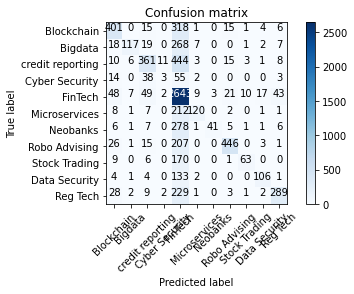

In [89]:
linear_clf.fit(x_train, y_train)
y_pred = linear_clf.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Blockchain', 'Bigdata', 'credit reporting', 'Cyber Security',
       'FinTech', 'Microservices', 'Neobanks', 'Robo Advising',
       'Stock Trading', 'Data Security', 'Reg Tech'])

In [90]:
print(confusion_matrix(y_test, y_pred))

[[ 450    3   13    0  256    2    1   26    0    4    6]
 [  22  154   13    0  240    2    0    4    0    1    3]
 [  17   14  427    8  356    3    4   20    3    0   10]
 [  10    0   43    4   49    3    0    2    0    0    4]
 [  53   23   82    2 2597    6   11   23   12   13   30]
 [   8    3   12    0  209  118    0    2    0    0    0]
 [   9    2    6    0  283    0   37    4    0    1    5]
 [  29    1   18    0  193    1    0  453    0    2    2]
 [   5    1    4    0  167    1    3    4   62    0    2]
 [   6    0    9    0  132    1    1    1    0  100    1]
 [  22    5   22    1  212    0    0    8    2    3  291]]


In [91]:
f1_score(y_test , y_pred, average='weighted')

0.598792350750447

#we can try oversampling or undersampling so that model dont overfit or deep learning methods.....
#as we can see the model have high accuracy at training but have low accuracy in testing the majority class is "FinTech" being a majority class will affect our predictions and give advantage to that label ....

In [116]:
from imblearn.under_sampling import NearMiss

In [117]:
y = df['Target']

In [118]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [119]:
y = le.fit_transform(y)

In [120]:
y = np.asarray(y)

In [122]:
y.shape

(22704,)

In [121]:
#if we do undersampling with tfidf 
rm = NearMiss(random_state=42)
X_res, y_res = rm.fit_sample(x_tfidf, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [123]:
X_res.shape 

(3817, 10000)

In [124]:
y_res.shape

(3817,)

In [125]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({4: 8551, 2: 2640, 0: 2267, 7: 2206, 10: 1748, 1: 1375, 6: 1069, 5: 977, 9: 787, 8: 737, 3: 347})
Resampled dataset shape Counter({0: 347, 1: 347, 2: 347, 3: 347, 4: 347, 5: 347, 6: 347, 7: 347, 8: 347, 9: 347, 10: 347})


In [101]:
y_res[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [102]:
X_res.shape

(3817, 10000)

In [126]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=0)

In [127]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [128]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [129]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.402
Confusion matrix, without normalization


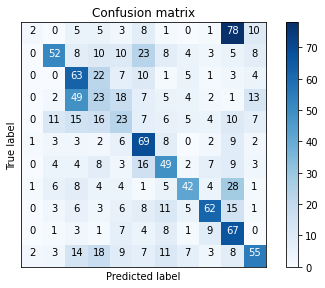

In [130]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=[])

In [131]:
from sklearn.model_selection import cross_val_score
classifier  = MultinomialNB()

In [132]:
classifier = MultinomialNB()
print(cross_val_score(classifier, X_train , y_train , cv=10, scoring='accuracy').mean())

0.4270649509803922


accuracy: 0.402
Confusion matrix, without normalization


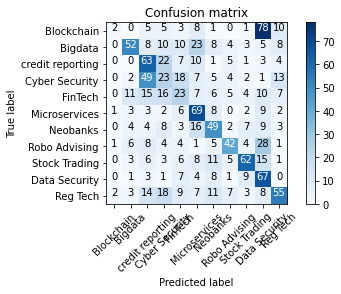

In [137]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm , classes=['Blockchain', 'Bigdata', 'credit reporting', 'Cyber Security',
       'FinTech', 'Microservices', 'Neobanks', 'Robo Advising',
       'Stock Trading', 'Data Security', 'Reg Tech'])

Because of oversampling it performs worse then before so it if data reduces it wont performs worse
we can try oversampling to overcome or try deep learning methods lstm and gru